In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import ssl

In [72]:
ssl._create_default_https_context = ssl._create_unverified_context

# Récupération du dataset CIFAR-10
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Filtre les données pour garder seulement les images d'animaux
animal_classes = [2, 3, 4, 5, 6, 7]
animals = {2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse'}
animal_indices = np.isin(y_train_full, animal_classes).flatten()
X_train_filtered = X_train_full[animal_indices]
y_train_filtered = y_train_full[animal_indices]
animal_indices2 = np.isin(y_test, animal_classes).flatten()
X_test_filtered = X_test[animal_indices2]
y_test_filtered = y_test[animal_indices2]

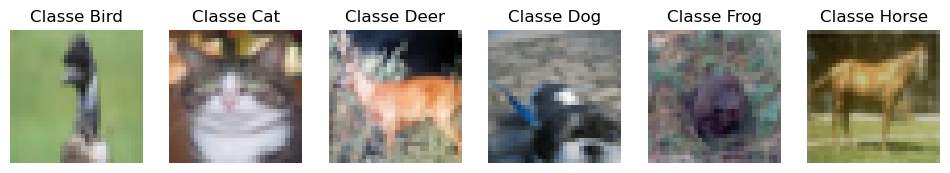

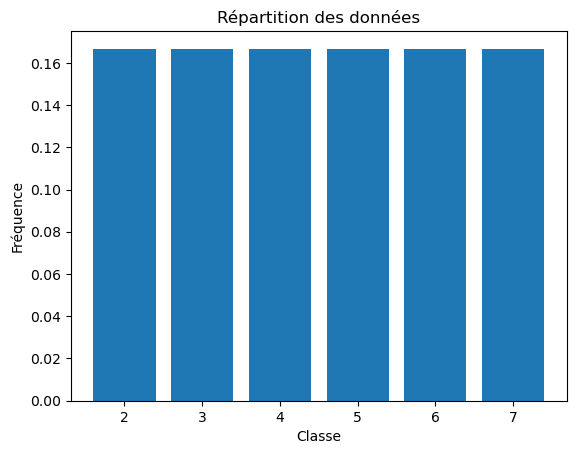

In [3]:
# Affiche une image par classe dans le Notebook
fig, axs = plt.subplots(1, len(animal_classes), figsize=(12, 3))
for i, animal_class in enumerate(animal_classes):
    class_indices = np.where(y_train_filtered == animal_class)[0]
    random_index = np.random.choice(class_indices)
    axs[i].imshow(X_train_filtered[random_index])
    axs[i].set_title(f"Classe {animals[animal_class]}")
    axs[i].axis("off")
plt.show()

# Analyse exploratoire du dataset
class_counts = np.unique(y_train_filtered, return_counts=True)
class_labels = [str(label) for label in class_counts[0]]
class_frequencies = class_counts[1] / len(y_train_filtered)

plt.bar(class_labels, class_frequencies)
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.title("Répartition des données")
plt.show()

In [73]:
# Séparation des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2)

# Prétraitement des données
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test_filtered = X_test_filtered.astype("float32") / 255.0

y_train_flat = y_train.reshape(-1, 1)
y_val_flat = y_val.reshape(-1, 1)
y_test_flat = y_test_filtered.reshape(-1, 1)

enc = OneHotEncoder(categories=[animal_classes], sparse_output=False)
enc.fit(y_train_flat)

y_train = enc.transform(y_train_flat)
y_val = enc.transform(y_val_flat)
y_test_filtered = enc.transform(y_test_flat)


y_val.shape

(6000, 6)

In [14]:
X_test_filtered.shape

(6000, 32, 32, 3)

In [6]:
# Construction du modèle MLP
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

# Compilation et entraînement du modèle MLP
mlp_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
mlp_history = mlp_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
750/750 [==============================] - 21s 27ms/step - loss: 1.5524 - accuracy: 0.3825 - val_loss: 1.5257 - val_accuracy: 0.3960
Epoch 2/20
750/750 [==============================] - 18s 24ms/step - loss: 1.4414 - accuracy: 0.4313 - val_loss: 1.5613 - val_accuracy: 0.3898
Epoch 3/20
750/750 [==============================] - 17s 22ms/step - loss: 1.3934 - accuracy: 0.4507 - val_loss: 1.6707 - val_accuracy: 0.3582
Epoch 4/20
750/750 [==============================] - 17s 23ms/step - loss: 1.3664 - accuracy: 0.4672 - val_loss: 1.4669 - val_accuracy: 0.4130
Epoch 5/20
750/750 [==============================] - 18s 24ms/step - loss: 1.3395 - accuracy: 0.4764 - val_loss: 1.5263 - val_accuracy: 0.3972
Epoch 6/20
750/750 [==============================] - 19s 25ms/step - loss: 1.3182 - accuracy: 0.4829 - val_loss: 1.6031 - val_accuracy: 0.3798
Epoch 7/20
750/750 [==============================] - 19s 26ms/step - loss: 1.2956 - accuracy: 0.4920 - val_loss: 1.5063 - val_accuracy:

In [7]:
# Construction du modèle CNN
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

# Compilation et entraînement du modèle CNN
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
750/750 [==============================] - 45s 59ms/step - loss: 1.3409 - accuracy: 0.4891 - val_loss: 1.2895 - val_accuracy: 0.5037
Epoch 2/20
750/750 [==============================] - 45s 60ms/step - loss: 1.0982 - accuracy: 0.5880 - val_loss: 1.2451 - val_accuracy: 0.5377
Epoch 3/20
750/750 [==============================] - 46s 62ms/step - loss: 1.0072 - accuracy: 0.6258 - val_loss: 1.6021 - val_accuracy: 0.4988
Epoch 4/20
750/750 [==============================] - 45s 60ms/step - loss: 0.9441 - accuracy: 0.6520 - val_loss: 1.1929 - val_accuracy: 0.5678
Epoch 5/20
750/750 [==============================] - 44s 59ms/step - loss: 0.8850 - accuracy: 0.6747 - val_loss: 1.1496 - val_accuracy: 0.5663
Epoch 6/20
750/750 [==============================] - 45s 60ms/step - loss: 0.8408 - accuracy: 0.6900 - val_loss: 1.2771 - val_accuracy: 0.5217
Epoch 7/20
750/750 [==============================] - 44s 59ms/step - loss: 0.7900 - accuracy: 0.7094 - val_loss: 1.5773 - val_accuracy:

In [69]:
X_test_filtered.shape

(6000, 32, 32, 3)

In [77]:
# Évaluation des modèles sur les ensembles de validation et de test
y_test_indices = np.argmax(y_test_filtered, axis=1)

mlp_val_loss, mlp_val_accuracy = mlp_model.evaluate(X_val, y_val)
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test_filtered, y_test_filtered)
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_filtered, y_test_filtered)

# Rapport de classification pour les modèles MLP et CNN
mlp_pred = np.argmax(mlp_model.predict(X_test_filtered), axis=-1)
cnn_pred = np.argmax(cnn_model.predict(X_test_filtered), axis=-1)

188/188 [==============================] - 2s 9ms/step


Rapport de classification MLP :
              precision    recall  f1-score   support

           0       0.46      0.41      0.43      1000
           1       0.34      0.42      0.38      1000
           2       0.50      0.31      0.38      1000
           3       0.44      0.44      0.44      1000
           4       0.50      0.64      0.56      1000
           5       0.61      0.59      0.60      1000

    accuracy                           0.47      6000
   macro avg       0.48      0.47      0.47      6000
weighted avg       0.48      0.47      0.47      6000

-----------------------------------------
Rapport de classification CNN :
              precision    recall  f1-score   support

           0       0.49      0.59      0.54      1000
           1       0.42      0.51      0.46      1000
           2       0.56      0.55      0.56      1000
           3       0.59      0.43      0.50      1000
           4       0.71      0.68      0.70      1000
           5       0.70   

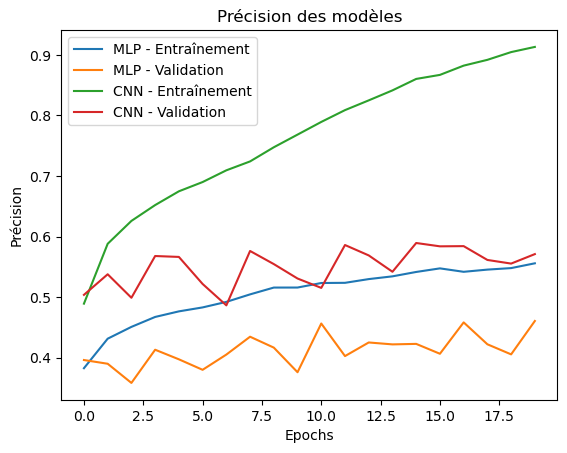

In [79]:
mlp_classification_report = classification_report(y_test_indices, mlp_pred)
cnn_classification_report = classification_report(y_test_indices, cnn_pred)

print("Rapport de classification MLP :")
print(mlp_classification_report)
print("-----------------------------------------")
print("Rapport de classification CNN :")
print(cnn_classification_report)

# Matrice de confusion pour les modèles MLP et CNN
mlp_confusion_matrix = confusion_matrix(y_test_indices, mlp_pred)
cnn_confusion_matrix = confusion_matrix(y_test_indices, cnn_pred)

print("Matrice de confusion MLP :")
print(mlp_confusion_matrix)
print("-----------------------------------------")
print("Matrice de confusion CNN :")
print(cnn_confusion_matrix)

# Visualisation des performances des modèles
plt.plot(mlp_history.history["accuracy"], label="MLP - Entraînement")
plt.plot(mlp_history.history["val_accuracy"], label="MLP - Validation")
plt.plot(cnn_history.history["accuracy"], label="CNN - Entraînement")
plt.plot(cnn_history.history["val_accuracy"], label="CNN - Validation")
plt.title("Précision des modèles")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

In [80]:
# Remédier à l'overfitting en utilisant le dropout et l'early stopping
dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

early_stopping = keras.callbacks.EarlyStopping(patience=3)

dropout_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dropout_history = dropout_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Évaluation du modèle avec dropout sur les ensembles de test
dropout_val_loss, dropout_val_accuracy = dropout_model.evaluate(X_val, y_val)
dropout_test_loss,dropout_test_accuracy = dropout_model.evaluate(X_test_filtered, y_test_filtered)

Epoch 1/100
750/750 [==============================] - 45s 59ms/step - loss: 1.4455 - accuracy: 0.4334 - val_loss: 1.2803 - val_accuracy: 0.5035
Epoch 2/100
750/750 [==============================] - 45s 61ms/step - loss: 1.2299 - accuracy: 0.5284 - val_loss: 1.2626 - val_accuracy: 0.5195
Epoch 3/100
750/750 [==============================] - 49s 66ms/step - loss: 1.1456 - accuracy: 0.5700 - val_loss: 1.1740 - val_accuracy: 0.5420
Epoch 4/100
750/750 [==============================] - 44s 59ms/step - loss: 1.1007 - accuracy: 0.5829 - val_loss: 1.2553 - val_accuracy: 0.5125
Epoch 5/100
750/750 [==============================] - 46s 61ms/step - loss: 1.0564 - accuracy: 0.5997 - val_loss: 1.4358 - val_accuracy: 0.4815
Epoch 6/100
188/188 [==============================] - 8s 42ms/step - loss: 1.2963 - accuracy: 0.5250


In [81]:
# Conclusion sur les résultats obtenus
print("Précision du modèle MLP sur l'ensemble de validation :", mlp_val_accuracy)
print("Précision du modèle MLP sur l'ensemble de test :", mlp_test_accuracy)
print("Précision du modèle CNN sur l'ensemble de validation :", cnn_val_accuracy)
print("Précision du modèle CNN sur l'ensemble de test :", cnn_test_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de validation :", dropout_val_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de test :", dropout_test_accuracy)

Précision du modèle MLP sur l'ensemble de validation : 0.5235000252723694
Précision du modèle MLP sur l'ensemble de test : 0.46933332085609436
Précision du modèle CNN sur l'ensemble de validation : 0.8703333139419556
Précision du modèle CNN sur l'ensemble de test : 0.5699999928474426
Précision du modèle avec dropout sur l'ensemble de validation : 0.5115000009536743
Précision du modèle avec dropout sur l'ensemble de test : 0.5249999761581421
